## Gather

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [106]:
test=pd.read_csv('aug_train.csv')
test_clean=test.copy()
test_clean

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## Assess

In [107]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [108]:
test_clean[test_clean.gender.isnull()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,11398,city_103,0.920,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,never,15,0.0
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19145,155,city_44,0.725,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,190,0.0
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0


In [109]:
sum(test_clean.experience.isnull())

65

In [110]:
test_clean.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [111]:
test_clean.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [112]:
test_clean.enrollee_id.sort_values()

17321        1
6730         2
10024        4
15817        5
4552         7
         ...  
17935    33375
5009     33376
3351     33377
4756     33379
1663     33380
Name: enrollee_id, Length: 19158, dtype: int64

In [113]:
test_clean[test_clean.duplicated()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [114]:
test_clean.sample(8)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8241,4254,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,25,0.0
4249,4164,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,500-999,Pvt Ltd,>4,100,0.0
12469,29597,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,<1,50-99,Pvt Ltd,1,55,1.0
2165,19443,city_46,0.762,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,3,49,0.0
15651,30137,city_10,0.895,NaN,Has relevent experience,no_enrollment,Graduate,STEM,4,50-99,Pvt Ltd,1,124,0.0
551,11739,city_114,0.926,Male,Has relevent experience,Part time course,Graduate,STEM,18,100-500,NGO,3,84,0.0
12733,22374,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,11,1000-4999,Pvt Ltd,2,10,1.0
6165,19698,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,STEM,6,10/49,Early Stage Startup,1,34,0.0


## Clean

### Quality

In [115]:
test_clean.enrollee_id=test_clean.enrollee_id.astype(str).str.pad(5,fillchar='0')
test_clean.enrollee_id.value_counts()


29998    1
00838    1
10622    1
25094    1
27890    1
        ..
03073    1
22572    1
20122    1
02169    1
27609    1
Name: enrollee_id, Length: 19158, dtype: int64

In [116]:
test_clean=test_clean.dropna()

In [117]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   object 
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   object 
 4   relevent_experience     8955 non-null   object 
 5   enrolled_university     8955 non-null   object 
 6   education_level         8955 non-null   object 
 7   major_discipline        8955 non-null   object 
 8   experience              8955 non-null   object 
 9   company_size            8955 non-null   object 
 10  company_type            8955 non-null   object 
 11  last_new_job            8955 non-null   object 
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(2), int64(1), object(11)
mem

In [118]:
test_clean.gender.value_counts()

Male      8073
Female     804
Other       78
Name: gender, dtype: int64

In [119]:
sum(test_clean.gender.isnull())

0

In [120]:
test_clean=test_clean[test_clean.gender!='Other']
test_clean.gender.value_counts()

Male      8073
Female     804
Name: gender, dtype: int64

In [121]:
test_clean.gender=test_clean.gender.astype('category')

In [122]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   object  
 5   enrolled_university     8877 non-null   object  
 6   education_level         8877 non-null   object  
 7   major_discipline        8877 non-null   object  
 8   experience              8877 non-null   object  
 9   company_size            8877 non-null   object  
 10  company_type            8877 non-null   object  
 11  last_new_job            8877 non-null   object  
 12  training_hours          8877 non-null   int64   
 13  target                  8877 non-null   float64 
dtypes: category(1), float64

In [123]:
test_clean.relevent_experience.value_counts()

Has relevent experience    7798
No relevent experience     1079
Name: relevent_experience, dtype: int64

In [124]:
test_clean.relevent_experience=test_clean.relevent_experience.astype('category')

In [125]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   category
 5   enrolled_university     8877 non-null   object  
 6   education_level         8877 non-null   object  
 7   major_discipline        8877 non-null   object  
 8   experience              8877 non-null   object  
 9   company_size            8877 non-null   object  
 10  company_type            8877 non-null   object  
 11  last_new_job            8877 non-null   object  
 12  training_hours          8877 non-null   int64   
 13  target                  8877 non-null   float64 
dtypes: category(2), float64

In [126]:
test_clean.enrolled_university.value_counts()

no_enrollment       7533
Full time course     822
Part time course     522
Name: enrolled_university, dtype: int64

In [127]:
test_clean.enrolled_university=test_clean.enrolled_university.astype('category')

In [128]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   category
 5   enrolled_university     8877 non-null   category
 6   education_level         8877 non-null   object  
 7   major_discipline        8877 non-null   object  
 8   experience              8877 non-null   object  
 9   company_size            8877 non-null   object  
 10  company_type            8877 non-null   object  
 11  last_new_job            8877 non-null   object  
 12  training_hours          8877 non-null   int64   
 13  target                  8877 non-null   float64 
dtypes: category(3), float64

In [129]:
test_clean.experience.value_counts()

>20    1868
5       571
10      545
6       533
9       531
7       480
4       474
3       427
8       397
15      393
11      367
14      333
16      298
2       294
12      290
13      230
17      206
19      176
18      166
1       120
<1       93
20       85
Name: experience, dtype: int64

In [130]:
test_clean.experience=test_clean.experience.replace('<1','0')
test_clean.experience=test_clean.experience.replace('>20','21')

In [131]:
test_clean.experience.value_counts()

21    1868
5      571
10     545
6      533
9      531
7      480
4      474
3      427
8      397
15     393
11     367
14     333
16     298
2      294
12     290
13     230
17     206
19     176
18     166
1      120
0       93
20      85
Name: experience, dtype: int64

In [132]:
test_clean.experience=test_clean.experience.astype(int)
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   category
 5   enrolled_university     8877 non-null   category
 6   education_level         8877 non-null   object  
 7   major_discipline        8877 non-null   object  
 8   experience              8877 non-null   int32   
 9   company_size            8877 non-null   object  
 10  company_type            8877 non-null   object  
 11  last_new_job            8877 non-null   object  
 12  training_hours          8877 non-null   int64   
 13  target                  8877 non-null   float64 
dtypes: category(3), float64

In [133]:
test_clean.last_new_job.value_counts()

1        3798
>4       1949
2        1561
3         604
4         594
never     371
Name: last_new_job, dtype: int64

In [134]:
test_clean.last_new_job=test_clean.last_new_job.replace('>4','5')
test_clean.last_new_job=test_clean.last_new_job.replace('never','0')
test_clean.last_new_job.value_counts()

1    3798
5    1949
2    1561
3     604
4     594
0     371
Name: last_new_job, dtype: int64

In [135]:
test_clean.last_new_job=test_clean.last_new_job.astype(int)

In [136]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   category
 5   enrolled_university     8877 non-null   category
 6   education_level         8877 non-null   object  
 7   major_discipline        8877 non-null   object  
 8   experience              8877 non-null   int32   
 9   company_size            8877 non-null   object  
 10  company_type            8877 non-null   object  
 11  last_new_job            8877 non-null   int32   
 12  training_hours          8877 non-null   int64   
 13  target                  8877 non-null   float64 
dtypes: category(3), float64

In [137]:
test_clean.company_type.value_counts()

Pvt Ltd                6738
Funded Startup          775
Public Sector           559
Early Stage Startup     382
NGO                     352
Other                    71
Name: company_type, dtype: int64

In [138]:
test_clean.company_type=test_clean.company_type.replace('Pvt Ltd','private limited company')
test_clean.company_type=test_clean.company_type.replace('NGO','Non-Governmental Organisation')
test_clean.company_type=test_clean.company_type.astype('category')
test_clean.company_type.value_counts()

private limited company          6738
Funded Startup                    775
Public Sector                     559
Early Stage Startup               382
Non-Governmental Organisation     352
Other                              71
Name: company_type, dtype: int64

In [139]:
test_clean.company_size.value_counts()

50-99        1966
100-500      1803
10000+       1431
10/49         944
1000-4999     922
<10           832
500-999       589
5000-9999     390
Name: company_size, dtype: int64

In [140]:
test_clean.education_level.value_counts()

Graduate    6190
Masters     2433
Phd          254
Name: education_level, dtype: int64

In [141]:
test_clean.education_level=test_clean.education_level.astype('category')

In [142]:
test_clean.major_discipline.value_counts()

STEM               7924
Humanities          374
Other               175
Business Degree     168
Arts                126
No Major            110
Name: major_discipline, dtype: int64

In [143]:
test_clean.major_discipline=test_clean.major_discipline.astype('category')

In [144]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   category
 5   enrolled_university     8877 non-null   category
 6   education_level         8877 non-null   category
 7   major_discipline        8877 non-null   category
 8   experience              8877 non-null   int32   
 9   company_size            8877 non-null   object  
 10  company_type            8877 non-null   category
 11  last_new_job            8877 non-null   int32   
 12  training_hours          8877 non-null   int64   
 13  target                  8877 non-null   float64 
dtypes: category(6), float64

In [145]:
test_clean.company_size=test_clean.company_size.replace('10000+','10000-99999')
test_clean.company_size=test_clean.company_size.replace('10/49','10-49')
test_clean.company_size=test_clean.company_size.replace('<10','1-10')

test_clean.company_size.value_counts()

50-99          1966
100-500        1803
10000-99999    1431
10-49           944
1000-4999       922
1-10            832
500-999         589
5000-9999       390
Name: company_size, dtype: int64

In [146]:
test_clean.target=test_clean.target.astype(int)
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   category
 5   enrolled_university     8877 non-null   category
 6   education_level         8877 non-null   category
 7   major_discipline        8877 non-null   category
 8   experience              8877 non-null   int32   
 9   company_size            8877 non-null   object  
 10  company_type            8877 non-null   category
 11  last_new_job            8877 non-null   int32   
 12  training_hours          8877 non-null   int64   
 13  target                  8877 non-null   int32   
dtypes: category(6), float64

### Tidiness

In [147]:
test_clean['company_size_from'],test_clean['company_size_to']=test_clean['company_size'].str.split('-',1).str

<ipython-input-147-94144345e165>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  test_clean['company_size_from'],test_clean['company_size_to']=test_clean['company_size'].str.split('-',1).str


In [148]:
test_clean.company_size_from=test_clean.company_size_from.astype(int)
test_clean.company_size_to=test_clean.company_size_to.astype(int)
test_clean=test_clean.drop('company_size',axis=1)
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   category
 5   enrolled_university     8877 non-null   category
 6   education_level         8877 non-null   category
 7   major_discipline        8877 non-null   category
 8   experience              8877 non-null   int32   
 9   company_type            8877 non-null   category
 10  last_new_job            8877 non-null   int32   
 11  training_hours          8877 non-null   int64   
 12  target                  8877 non-null   int32   
 13  company_size_from       8877 non-null   int32   
 14  company_size_to        

In [149]:
test_clean

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size_from,company_size_to
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,private limited company,5,47,0,50,99
4,00666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Funded Startup,4,8,0,50,99
7,00402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,private limited company,5,18,1,1,10
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,private limited company,1,46,1,50,99
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,private limited company,1,108,0,5000,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,private limited company,1,52,1,100,500
19149,00251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,private limited company,1,36,1,50,99
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,Public Sector,3,23,0,100,500
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Funded Startup,1,25,0,10,49


In [150]:
df = pd.DataFrame(test_clean) 
  
# saving the dataframe 
df.to_csv(r'D:\final.csv', index=False)

In [151]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8877 entries, 1 to 19155
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             8877 non-null   object  
 1   city                    8877 non-null   object  
 2   city_development_index  8877 non-null   float64 
 3   gender                  8877 non-null   category
 4   relevent_experience     8877 non-null   category
 5   enrolled_university     8877 non-null   category
 6   education_level         8877 non-null   category
 7   major_discipline        8877 non-null   category
 8   experience              8877 non-null   int32   
 9   company_type            8877 non-null   category
 10  last_new_job            8877 non-null   int32   
 11  training_hours          8877 non-null   int64   
 12  target                  8877 non-null   int32   
 13  company_size_from       8877 non-null   int32   
 14  company_size_to        

# visualization


In [152]:
file = pd.read_csv('final.csv');
file.enrollee_id=file.enrollee_id.astype(str).str.pad(5,fillchar='0')

file


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size_from,company_size_to
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,private limited company,5,47,0,50,99
1,00666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Funded Startup,4,8,0,50,99
2,00402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,private limited company,5,18,1,1,10
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,private limited company,1,46,1,50,99
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,private limited company,1,108,0,5000,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,private limited company,1,52,1,100,500
8873,00251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,private limited company,1,36,1,50,99
8874,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,Public Sector,3,23,0,100,500
8875,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Funded Startup,1,25,0,10,49


In [153]:
file.enrollee_id.value_counts()


29998    1
25929    1
14283    1
06042    1
06870    1
        ..
16842    1
05131    1
26336    1
10178    1
11027    1
Name: enrollee_id, Length: 8877, dtype: int64

In [154]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8877 non-null   object 
 1   city                    8877 non-null   object 
 2   city_development_index  8877 non-null   float64
 3   gender                  8877 non-null   object 
 4   relevent_experience     8877 non-null   object 
 5   enrolled_university     8877 non-null   object 
 6   education_level         8877 non-null   object 
 7   major_discipline        8877 non-null   object 
 8   experience              8877 non-null   int64  
 9   company_type            8877 non-null   object 
 10  last_new_job            8877 non-null   int64  
 11  training_hours          8877 non-null   int64  
 12  target                  8877 non-null   int64  
 13  company_size_from       8877 non-null   int64  
 14  company_size_to         8877 non-null   

## City development index analysis

- The mean value of city development is 0.83  
- The median is 0.91 and 
- The standard deviation equals 0.11  
- The first half of the values are less than 0.91 and the second half is more than 0.91.
- Looking at the standard deviation we can see, that the values do not differ from the average of 
  values.It means that most of the candidates are from well-developed cities.
- Most of the candidates come from the city_103. Next are city_21, city_16, city_114, city_160.


In [155]:
city_dev_index = file['city_development_index'].sort_values()
city_dev_index.head()
print("city_dev_Mean:", city_dev_index.mean())
print("city_dev_Median:", city_dev_index.median())
print("city_dev_Standard deviation:", city_dev_index.std())


city_dev_Mean: 0.8441975892757027
city_dev_Median: 0.91
city_dev_Standard deviation: 0.11639971276054528


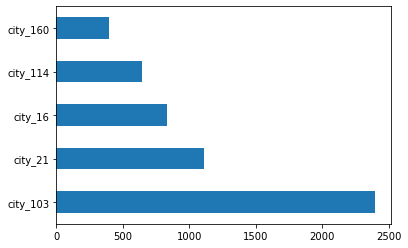

In [156]:
file['city'].value_counts().head(5).plot(kind='barh')


## Gender analysis


- We can see a big difference between the genders. In candidates, list prevails men.
- There are 8073 men and 804 women .


Male      8073
Female     804
Name: gender, dtype: int64


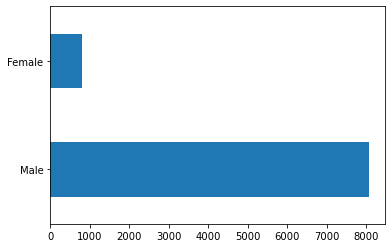

In [157]:
print(file['gender'].value_counts())
# file['gender'].value_counts().plot(kind='barh')
file.gender.value_counts().plot(kind='barh')


## Relevant experience analysis

- Around 7798 people have relevant experience and 1079 hasn't it. Based on genders, people mostly have a relevant experience.
- In the male group, 11.5% of men haven't got relevant experience. The group of women fared worse. In this group, 17.9% of women haven't got relevant experience.

In [158]:
file.relevent_experience.value_counts()


Has relevent experience    7798
No relevent experience     1079
Name: relevent_experience, dtype: int64

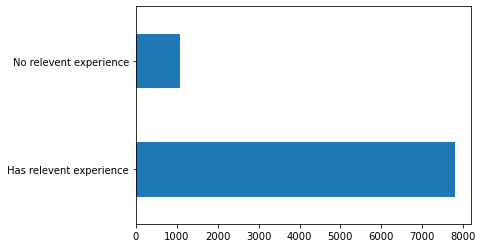

In [159]:
file['relevent_experience'].value_counts().plot(kind='barh')

relevent_experience      gender
Has relevent experience  Male      7138
                         Female     660
No relevent experience   Male       935
                         Female     144
Name: gender, dtype: int64

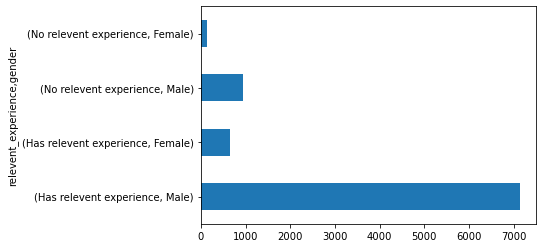

In [160]:
file.groupby(['relevent_experience'])['gender'].value_counts().plot(kind='barh')
file.groupby(['relevent_experience'])['gender'].value_counts()


In [161]:
percent_male_no_exp=(file.groupby(['relevent_experience'])['gender'].value_counts()[2])*(100)/(file.groupby(['relevent_experience'])['gender'].value_counts()[0]+file.groupby(['relevent_experience'])['gender'].value_counts()[2])
percent_male_no_exp

11.581815929642017

In [162]:
percent_female_no_exp=(file.groupby(['relevent_experience'])['gender'].value_counts()[3])*(100)/(file.groupby(['relevent_experience'])['gender'].value_counts()[1]+file.groupby(['relevent_experience'])['gender'].value_counts()[3])
percent_female_no_exp

17.91044776119403

## Enrolled university analysis

- The most of people did not attend college.
- 822 people attended college in a full-time course. 522 people attended college on a part-time course.
- 15.14% of candidates attended college.

In [163]:
file.enrolled_university.value_counts()

no_enrollment       7533
Full time course     822
Part time course     522
Name: enrolled_university, dtype: int64

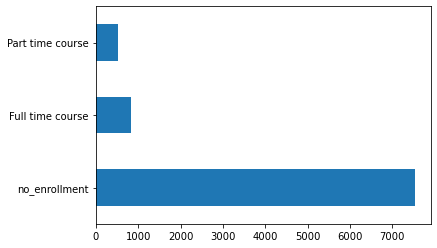

In [164]:
file.enrolled_university.value_counts().plot(kind='barh')

In [165]:
attendance = file.enrolled_university.value_counts()[1] + file.enrolled_university.value_counts()[2]

all_candidates=sum([file.enrolled_university.value_counts()[0],file.enrolled_university.value_counts()[1],file.enrolled_university.value_counts()[2]])
percent_of_attendance = (100*attendance)/(all_candidates)
percent_of_attendance


15.140250084488002

## Education level analysis

- The most candidates are in Graduate level 

Phd          254
Masters     2433
Graduate    6190
Name: education_level, dtype: int64

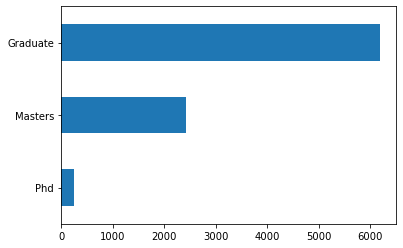

In [166]:
file.education_level.value_counts().sort_values().plot(kind='barh')
file.education_level.value_counts().sort_values()


 ## Major discipline analysis


- The vast majority of candidates specialize in the STEM discipline (7924 candidates).


`The next specializations are:`
* Humanities (374)
* Other (175)
* Business Degree (168)
* Arts (126)
* No Major (110)


No Major            110
Arts                126
Business Degree     168
Other               175
Humanities          374
STEM               7924
Name: major_discipline, dtype: int64

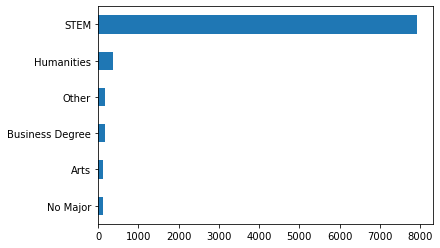

In [167]:
file.major_discipline.value_counts().sort_values().plot(kind='barh')
file.major_discipline.value_counts().sort_values()

- The most candidates who are specialized in STEM, have a Graduate level.
Data Science relies heavily on math and science. This explains why so many candidates specialize in STEM.

major_discipline  education_level
STEM              Graduate           5505
                  Masters            2180
                  Phd                 239
Humanities        Graduate            236
                  Masters             128
Name: education_level, dtype: int64

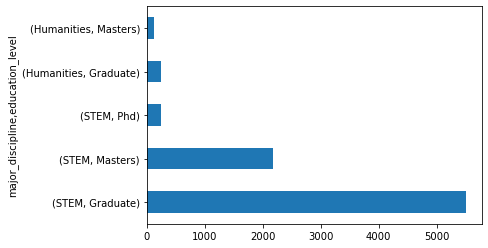

In [168]:
file.groupby(['major_discipline'])['education_level'].value_counts().sort_values(ascending=False).head(5).plot(kind='barh')
file.groupby(['major_discipline'])['education_level'].value_counts().sort_values(ascending=False).head(5)

## Experience analysis

- About 1868 candidates have over 20 years of experience in Data Science. There are also many people with 5 years of experience


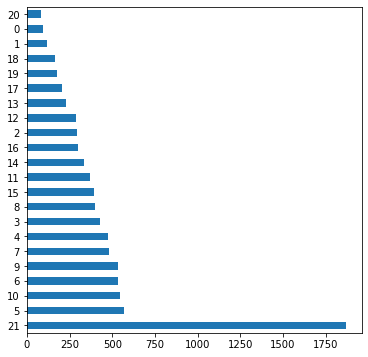

In [169]:

exp_val_counts = file.experience.value_counts()
plt.figure(figsize=(6, 6))
file.experience.value_counts().plot(kind='barh')


### We can see the increasing popularity of Data Science. Most candidates have between 6 and 10 years of expeiance and between 11 and 15 years of experience. 

In [170]:

exp_from_1_to_5_years=sum(file.experience <6)
exp_from_6_to_10_years=sum((file.experience >5)<11)
exp_from_11_to_15_years=sum((file.experience >10)<16)
exp_from_16_to_21_years=sum(file.experience >15)

print("Candidates with experience between less than one and five years: ", exp_from_1_to_5_years)
print("Candidates with experience between six and ten years: ", exp_from_6_to_10_years)
print("Candidates with experience between eleven and fifteen years: ", exp_from_11_to_15_years)
print("Candidates with experience between sixteen and more than twenty years: ", exp_from_16_to_21_years)

Candidates with experience between less than one and five years:  1979
Candidates with experience between six and ten years:  8877
Candidates with experience between eleven and fifteen years:  8877
Candidates with experience between sixteen and more than twenty years:  2799


## Company size analysis

- The most candidates work in small companies (from 50 to 99 and from 100 to 500 workers).

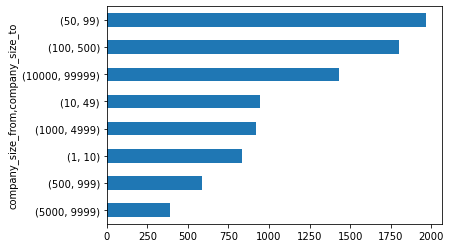

In [171]:

file.groupby(['company_size_from'])['company_size_to'].value_counts().sort_values().plot(kind='barh')


## Company type analysis

- Most of the companies which candidates work is a private limited company (6738). Next are Funded Startup (775) and Public sector (559).

private limited company          6738
Funded Startup                    775
Public Sector                     559
Early Stage Startup               382
Non-Governmental Organisation     352
Other                              71
Name: company_type, dtype: int64

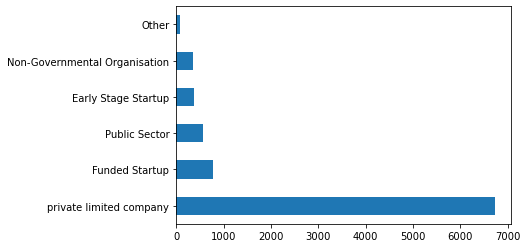

In [172]:

file.company_type.value_counts().plot(kind='barh')
file.company_type.value_counts()

## Last new job analysis

- The most common difference between the candidate's past and current job is 1 year.

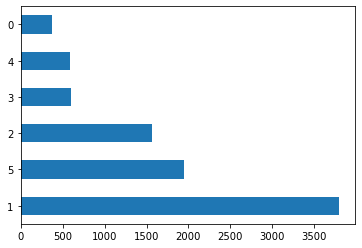

In [173]:

file.last_new_job.value_counts().plot(kind='barh')

# Target
- 0 – Not looking for job change,
- 1 – Looking for a job change
### As you can see, here we have imbalanced data, the number of 1 ( Looking for a job change) < 0 (Not looking for job change)



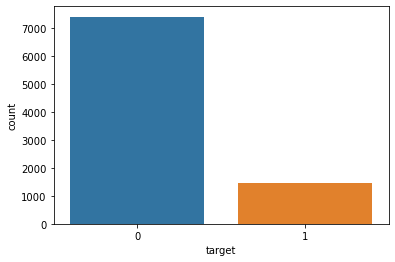

In [174]:
sns.countplot(file['target'])

### the probability that the person will not change the job is higher 

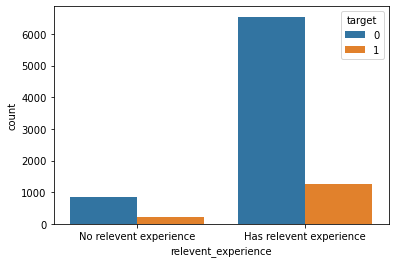

In [175]:
sns.countplot(file['relevent_experience'],hue=file['target'])

### The most candidates with relevent experience and with not relevent experience are not looking for a job chance

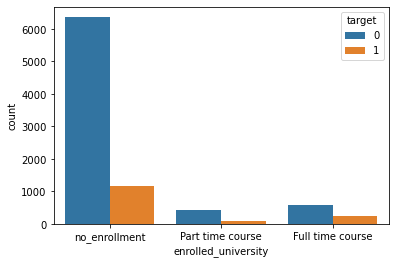

In [176]:
sns.countplot(file['enrolled_university'],hue=file['target'])

#### 1.Most of the person are having no enrollment in any university and those without any enrollment have no interest in changing their job

#### 2.Part Time course enrolled students are very less and they also dont want to change

#### 3.Full time enrolled are not very much also but in proportion they have higher chance of changing the job than others

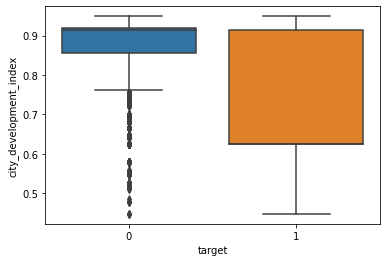

In [177]:
sns.boxplot(x='target',y='city_development_index',data=file)

#### 1.Most of the people who are not changing jobs are from city with high development index so basically they are having a                comfortable life in  respective city are not willing to change jobs
#### 2.People in cities with less development index tend to change their jobs for better life style maybe!



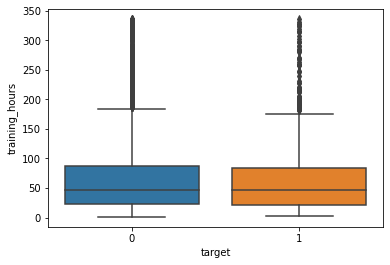

In [178]:
sns.boxplot(y='training_hours',x='target',data=file)

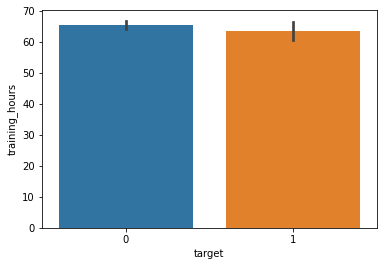

In [179]:
sns.barplot(y='training_hours',x='target',data=file)

#### There is no much difference between training hours of those who are wishing to change and those who are not , so not much can be deduced from this classification



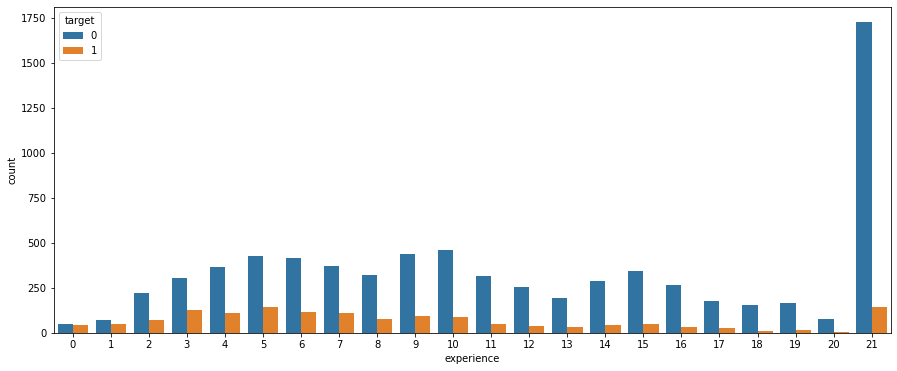

In [180]:
plt.figure(figsize=(15,6))
sns.countplot(file['experience'],hue=file['target'])

#### 1.people who have experience less than 1 year have more tendency to change their job while those with more than 20 years of experience have very less tendency of changing jobz

#### 2.As experience increase , tendency to change the job becomes more and more less



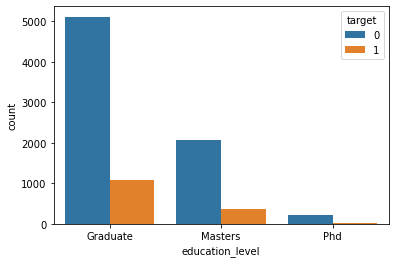

In [181]:
sns.countplot(file['education_level'],hue=file['target'])

#### 1.Graduates have very less chance of leaving

#### 2.Regardless of any education level , there is a very less chance of changing job

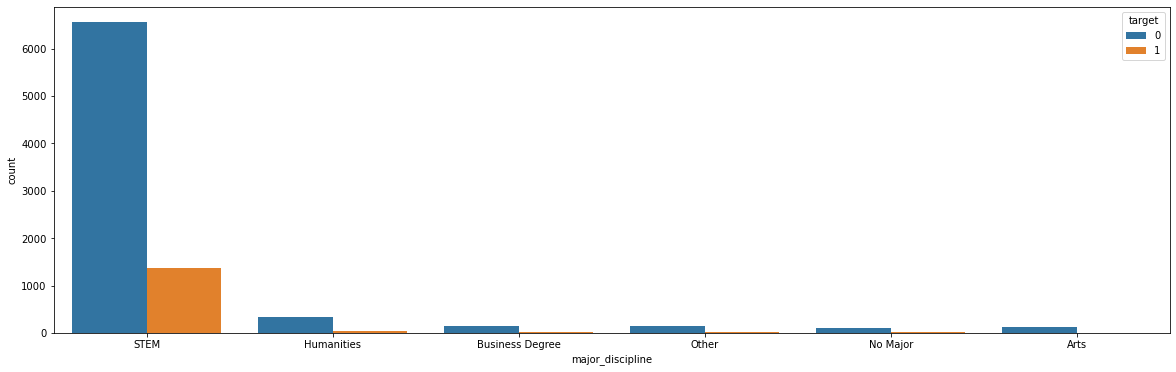

In [182]:
plt.figure(figsize=(20,6))
sns.countplot(file['major_discipline'],hue=file['target'])

#### 1.Mostly people are STEM

#### 2.In STEM , people tend not to change the job

#### 3.People not tend to change job in any field

# Classification

In [183]:
np.random.seed(3)
test_clean2=file.copy()

In [184]:
test_clean2

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size_from,company_size_to
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,private limited company,5,47,0,50,99
1,00666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Funded Startup,4,8,0,50,99
2,00402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,private limited company,5,18,1,1,10
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,private limited company,1,46,1,50,99
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,private limited company,1,108,0,5000,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,private limited company,1,52,1,100,500
8873,00251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,private limited company,1,36,1,50,99
8874,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,Public Sector,3,23,0,100,500
8875,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,Funded Startup,1,25,0,10,49


In [185]:
test_clean2.gender=test_clean2.gender.replace('Male','1')
test_clean2.gender=test_clean2.gender.replace('Female','0')
test_clean2.gender

0       1
1       1
2       1
3       1
4       1
       ..
8872    1
8873    1
8874    0
8875    0
8876    1
Name: gender, Length: 8877, dtype: object

In [186]:
test_clean2.enrolled_university.value_counts()

no_enrollment       7533
Full time course     822
Part time course     522
Name: enrolled_university, dtype: int64

In [187]:
test_clean2.enrolled_university=test_clean2.enrolled_university.replace('Full time course','1')
test_clean2.enrolled_university=test_clean2.enrolled_university.replace('Part time course','0.5')
test_clean2.enrolled_university=test_clean2.enrolled_university.replace('no_enrollment','0')
test_clean2.enrolled_university

0       0
1       0
2       0
3       0
4       0
       ..
8872    1
8873    0
8874    0
8875    0
8876    0
Name: enrolled_university, Length: 8877, dtype: object

In [188]:
test_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8877 non-null   object 
 1   city                    8877 non-null   object 
 2   city_development_index  8877 non-null   float64
 3   gender                  8877 non-null   object 
 4   relevent_experience     8877 non-null   object 
 5   enrolled_university     8877 non-null   object 
 6   education_level         8877 non-null   object 
 7   major_discipline        8877 non-null   object 
 8   experience              8877 non-null   int64  
 9   company_type            8877 non-null   object 
 10  last_new_job            8877 non-null   int64  
 11  training_hours          8877 non-null   int64  
 12  target                  8877 non-null   int64  
 13  company_size_from       8877 non-null   int64  
 14  company_size_to         8877 non-null   

In [189]:
test_clean2['Thecity'] , test_clean2['The_City']= test_clean2['city'].str.split('_', 1).str

<ipython-input-189-82acec83e9d5>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  test_clean2['Thecity'] , test_clean2['The_City']= test_clean2['city'].str.split('_', 1).str


In [190]:
test_clean2 = test_clean2.drop('Thecity', axis=1)
test_clean2 = test_clean2.drop('city', axis=1)
test_clean2['city']=test_clean2['The_City']
test_clean2 = test_clean2.drop('The_City', axis=1)

In [191]:
test_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8877 non-null   object 
 1   city_development_index  8877 non-null   float64
 2   gender                  8877 non-null   object 
 3   relevent_experience     8877 non-null   object 
 4   enrolled_university     8877 non-null   object 
 5   education_level         8877 non-null   object 
 6   major_discipline        8877 non-null   object 
 7   experience              8877 non-null   int64  
 8   company_type            8877 non-null   object 
 9   last_new_job            8877 non-null   int64  
 10  training_hours          8877 non-null   int64  
 11  target                  8877 non-null   int64  
 12  company_size_from       8877 non-null   int64  
 13  company_size_to         8877 non-null   int64  
 14  city                    8877 non-null   

In [192]:
test_clean2.relevent_experience.value_counts()

Has relevent experience    7798
No relevent experience     1079
Name: relevent_experience, dtype: int64

In [193]:
test_clean2.relevent_experience=test_clean2.relevent_experience.replace('Has relevent experience','1')
test_clean2.relevent_experience=test_clean2.relevent_experience.replace('No relevent experience','0')

In [194]:
test_clean2.relevent_experience

0       0
1       1
2       1
3       1
4       1
       ..
8872    0
8873    1
8874    1
8875    1
8876    1
Name: relevent_experience, Length: 8877, dtype: object

In [195]:
test_clean2

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size_from,company_size_to,city
0,29725,0.776,1,0,0,Graduate,STEM,15,private limited company,5,47,0,50,99,40
1,00666,0.767,1,1,0,Masters,STEM,21,Funded Startup,4,8,0,50,99,162
2,00402,0.762,1,1,0,Graduate,STEM,13,private limited company,5,18,1,1,10,46
3,27107,0.920,1,1,0,Graduate,STEM,7,private limited company,1,46,1,50,99,103
4,23853,0.920,1,1,0,Graduate,STEM,5,private limited company,1,108,0,5000,9999,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8872,21319,0.624,1,0,1,Graduate,STEM,1,private limited company,1,52,1,100,500,21
8873,00251,0.920,1,1,0,Masters,STEM,9,private limited company,1,36,1,50,99,103
8874,32313,0.920,0,1,0,Graduate,STEM,10,Public Sector,3,23,0,100,500,160
8875,29754,0.920,0,1,0,Graduate,Humanities,7,Funded Startup,1,25,0,10,49,103


In [196]:
test_clean2['city'].unique()

array(['40', '162', '46', '103', '61', '114', '159', '21', '160', '16',
       '83', '64', '105', '104', '73', '75', '100', '93', '13', '36',
       '67', '71', '57', '65', '11', '136', '97', '50', '173', '82', '89',
       '150', '90', '98', '28', '115', '94', '165', '142', '12', '43',
       '74', '102', '116', '99', '23', '138', '45', '41', '72', '19',
       '101', '20', '106', '10', '157', '144', '91', '133', '145', '123',
       '175', '128', '167', '84', '54', '126', '81', '176', '131', '149',
       '24', '27', '118', '152', '141', '76', '70', '143', '78', '53',
       '158', '2', '77', '117', '120', '9', '39', '80', '155', '179',
       '37', '30', '44', '14', '55', '42', '1', '59', '69', '7', '109',
       '26', '62', '18', '127', '33', '134', '146', '107', '166', '121',
       '129', '48', '139', '25'], dtype=object)

In [197]:
test_clean2.city=test_clean2.city.astype(int)


In [198]:
test_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8877 non-null   object 
 1   city_development_index  8877 non-null   float64
 2   gender                  8877 non-null   object 
 3   relevent_experience     8877 non-null   object 
 4   enrolled_university     8877 non-null   object 
 5   education_level         8877 non-null   object 
 6   major_discipline        8877 non-null   object 
 7   experience              8877 non-null   int64  
 8   company_type            8877 non-null   object 
 9   last_new_job            8877 non-null   int64  
 10  training_hours          8877 non-null   int64  
 11  target                  8877 non-null   int64  
 12  company_size_from       8877 non-null   int64  
 13  company_size_to         8877 non-null   int64  
 14  city                    8877 non-null   

In [199]:
test_clean2['company_type'].unique()

array(['private limited company', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', 'Non-Governmental Organisation', 'Other'],
      dtype=object)

In [200]:
test_clean2.gender=test_clean2.gender.astype(int)
test_clean2.relevent_experience=test_clean2.relevent_experience.astype(int)
test_clean2.enrolled_university=test_clean2.enrolled_university.astype(float)



In [201]:
test_clean2['enrolled_university'].unique()

array([0. , 0.5, 1. ])

In [202]:
test_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8877 non-null   object 
 1   city_development_index  8877 non-null   float64
 2   gender                  8877 non-null   int32  
 3   relevent_experience     8877 non-null   int32  
 4   enrolled_university     8877 non-null   float64
 5   education_level         8877 non-null   object 
 6   major_discipline        8877 non-null   object 
 7   experience              8877 non-null   int64  
 8   company_type            8877 non-null   object 
 9   last_new_job            8877 non-null   int64  
 10  training_hours          8877 non-null   int64  
 11  target                  8877 non-null   int64  
 12  company_size_from       8877 non-null   int64  
 13  company_size_to         8877 non-null   int64  
 14  city                    8877 non-null   

Data preprocessing for classification

In [203]:
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5
def company_t(x):
    if x=='private limited company':return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='Non-Governmental Organisation': return 5

test_clean2['education_level'] = test_clean2['education_level'].apply(edu_level)
test_clean2['major_discipline'] = test_clean2['major_discipline'].apply(major)
test_clean2['company_type'] = test_clean2['company_type'].apply(company_t)



In [204]:
test_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8877 non-null   object 
 1   city_development_index  8877 non-null   float64
 2   gender                  8877 non-null   int32  
 3   relevent_experience     8877 non-null   int32  
 4   enrolled_university     8877 non-null   float64
 5   education_level         8877 non-null   int64  
 6   major_discipline        8877 non-null   int64  
 7   experience              8877 non-null   int64  
 8   company_type            8877 non-null   int64  
 9   last_new_job            8877 non-null   int64  
 10  training_hours          8877 non-null   int64  
 11  target                  8877 non-null   int64  
 12  company_size_from       8877 non-null   int64  
 13  company_size_to         8877 non-null   int64  
 14  city                    8877 non-null   

### Model classification


In [205]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# split data
X = test_clean2.drop("target", axis=1)
y = test_clean2["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.333)
model =  KNeighborsClassifier()
model.fit(X_train, y_train);
model.score(X_test, y_test)


0.8207642881298614

visualization of score(y_pred)_the relation between true positive rate and false positive rate

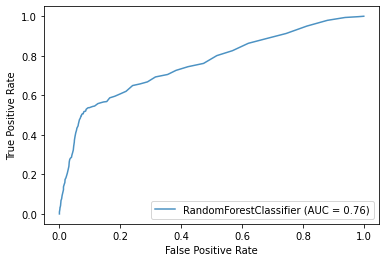

In [206]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import plot_roc_curve
from sklearn.svm import SVC

rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)

plt.show()


In [207]:
y_pred = model.predict(X_test)

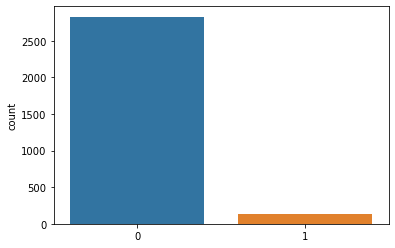

In [208]:
sns.countplot(y_pred)